In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/mllab/student.csv')

In [ ]:
data['total_marks'] = data['Math'] + data['Reading'] + data['Writing']
# Create a new column 'sum_greater_than_125' where 1 is stored if sum is greater than 125, otherwise 0
data['res'] = data['total_marks'].apply(lambda x: 1 if x > 150 else 0)

In [ ]:
counts = data['res'].value_counts()
counts

res
1    892
0    108
Name: count, dtype: int64

In [ ]:
df = pd.DataFrame(data)
# Initialize StandardScaler
scaler = StandardScaler()
# Normalize features
normalized_features = scaler.fit_transform(df)
# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=df.columns)
print(normalized_df)



         Math   Reading   Writing  total_marks      res
0   -1.279393 -0.127784 -0.368657    -0.627115  0.34796
1   -0.350855  0.759606  0.222140     0.215970  0.34796
2    0.776656  0.691345  0.616004     0.731189  0.34796
3    0.577683  0.896128  0.681648     0.754608  0.34796
4   -0.549827 -0.400827 -0.434301    -0.486601  0.34796
..        ...       ...       ...          ...      ...
995  0.312387  0.281781  0.090851     0.239389  0.34796
996  0.378711  1.100910  1.403733     1.012217  0.34796
997  1.439897  1.169171  1.666309     1.504017  0.34796
998  1.041952  0.827867  0.616004     0.871703  0.34796
999 -0.085558 -0.264306  0.222140    -0.041639  0.34796

[1000 rows x 5 columns]


In [ ]:
X = normalized_df[['Math', 'Reading','Writing']]
y = data['res']



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.T
x_test = x_test.T

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape((1,-1))
y_test = y_test.reshape((1,-1))

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3, 800)
(3, 200)
(1, 800)
(1, 200)


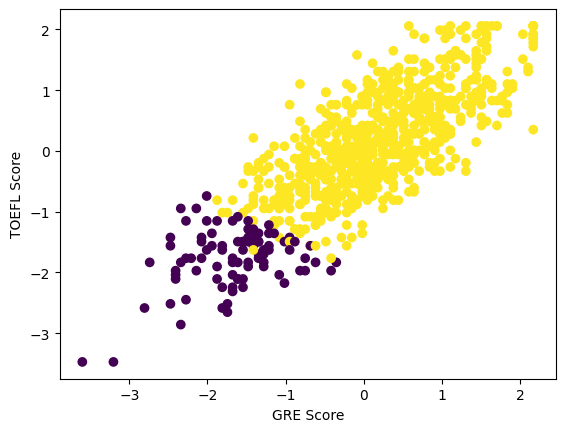

In [ ]:
plt.scatter(x_train[0], x_train[1], cmap='viridis',c=y_train)
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score');

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [ ]:
# Gradient descent function to update weights
def propagate(w, b, X, Y,lambd=0.01):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = np.sum(-(Y * np.log(A) + (1-Y) * np.log(1-A)) / m) + (lambd / (2 * m)) * np.sum(w ** 2)  # Regularized cost
    dw = (np.dot(X, (A-Y).T) + lambd * w) / m  # Regularized gradient
    db = np.sum(A-Y)/m
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    return grads, cost


In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs


In [ ]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = np.where(A > 0.5, 1., 0.)
    return Y_prediction

In [ ]:

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [ ]:
d = model(x_train, y_train, x_test, y_test, num_iterations = 1000000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100000: 0.081164
Cost after iteration 200000: 0.063593
Cost after iteration 300000: 0.055422
Cost after iteration 400000: 0.050358
Cost after iteration 500000: 0.046789
Cost after iteration 600000: 0.044081
Cost after iteration 700000: 0.041925
Cost after iteration 800000: 0.040148
Cost after iteration 900000: 0.038648
train accuracy: 99.875 %
test accuracy: 100.0 %


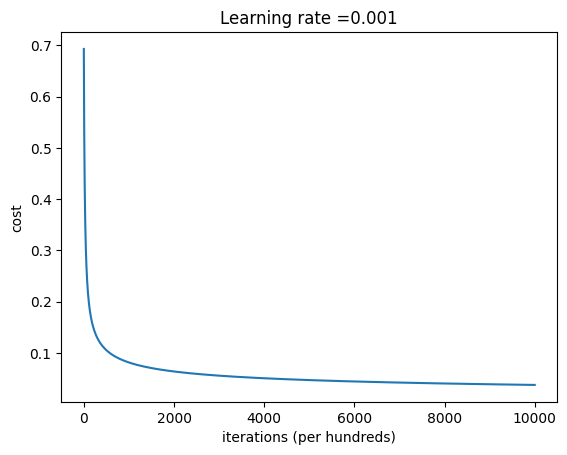

In [ ]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()